In [7]:
from uncertainties import ufloat

from uncertainties.umath import *  # sin(), etc.
x = ufloat(1, 0.1)  # x = 1+/-0.1
print 2*x
sin(2*x)  # In a Python shell, "print" is optional


2.00+/-0.20


0.9092974268256817+/-0.08322936730942848

In [2]:
l = ufloat(4, 0.1)
h = ufloat(3, .05)
w = ufloat(6, 0.1)

volume = l * h * w
print volume

area = l * h
print area

total_cost = 10 * area + 0.4 * volume
print total_cost

72.0+/-2.5
12.0+/-0.4
149+/-4


In [9]:
# Find the most sensitive parameter in the chain
# Vary the parameter and see sensitivity of output

l = ufloat(4, 0.3)
w = ufloat(6, 0.1)
volume = l * h * w
area = l * h
total_cost = 10 * area + 0.4 * volume
print total_cost

149+/-11


In [12]:
def evaluate_model(X):
    volume = X[0] * X[1] * X[2]
    area = X[0] * X[1]
    total_cost = 10 * area + 0.4 * volume
    return total_cost

from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

problem = {
    'num_vars': 3,
    'names': ['l', 'h', 'w'],
    'bounds': [[3.9, 4.1],
               [2.97, 3.03],
               [5.9, 6.1]]
}

param_values = saltelli.sample(problem, 1000)
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = evaluate_model(X)

Si = sobol.analyze(problem, Y)
print Si['S1']
print Si['ST']
print Si['S2']

# Evaluate defects in Y
oos_gt = len(Y[Y>155])
oos_lt = len(Y[Y<145])
is_total = len(Y) - oos_gt - oos_lt
oos_total = oos_gt + oos_lt
dpmo_total = oos_total * 1.0/len(Y)

print 'Classification: (%d, %d, %d), DPMO: %f'%(oos_lt, is_total, oos_gt, dpmo_total)

[0.84852491 0.13714754 0.0132759 ]
[0.84956686 0.1362903  0.01418736]
[[        nan  0.002073    0.00219045]
 [        nan         nan -0.00155663]
 [        nan         nan         nan]]
Classification: (355, 7645, 0), DPMO: 0.044375


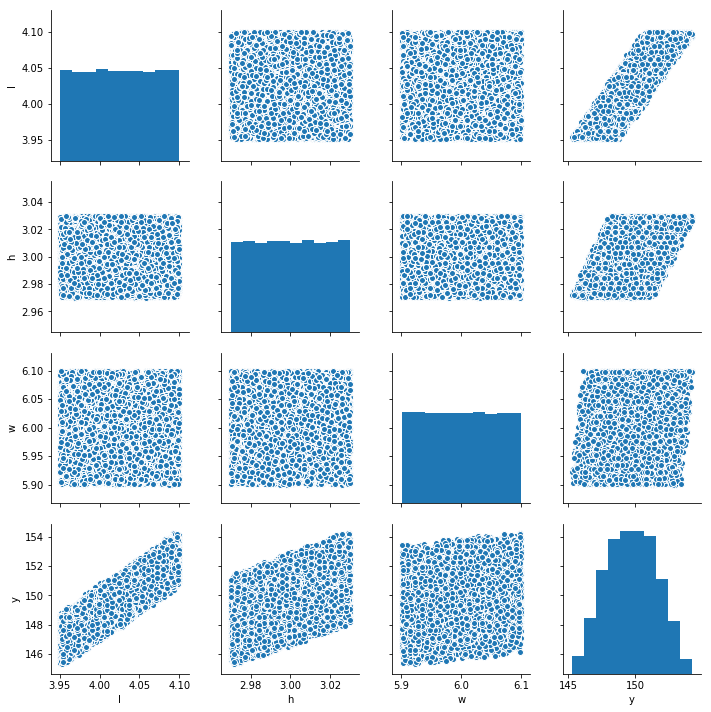

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plot_df = pd.DataFrame()
plot_df['l'] = param_values[:,0]
plot_df['h'] = param_values[:,1]
plot_df['w'] = param_values[:,2]
plot_df['y'] = Y

import seaborn as sns
sns.pairplot(plot_df)
plt.show()

In [ ]:
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
# https://github.com/xflr6/graphviz/blob/master/examples/notebook.ipynb
